In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pcap2ipfix-applabel-yafscii.csv')
df

,start-time,end-time,duration,rtt,proto,sip,sp,dip,dp,iflags,...,tag,rtag,pkt,oct,rpkt,roct,app,entropy,rentropy,end-reason
0,2024-06-19 20:06:58.527,2024-06-19 20:06:58.552,0.025,0.000,6,212.102.59.160,8080,192.168.50.2,59002,AP,...,0,0,4,232,3,156,0,0,0,NaN
1,2024-06-19 20:06:58.552,2024-06-19 20:06:58.552,0.000,0.000,6,212.102.59.160,8080,192.168.50.2,59002,A,...,0,0,1,52,1,40,0,0,0,NaN
2,2024-06-19 20:06:58.657,2024-06-19 20:06:58.676,0.019,0.000,6,181.214.164.4,443,192.168.50.2,59001,AP,...,0,0,3,180,3,156,0,0,0,NaN
3,2024-06-19 20:07:04.082,2024-06-19 20:07:04.388,0.306,0.035,6,192.168.50.2,59019,129.137.3.13,443,S,...,0,0,13,1062,11,6859,443,223,241,NaN
4,2024-06-19 20:07:17.577,2024-06-19 20:07:17.591,0.014,0.000,6,13.107.253.40,443,192.168.50.2,58993,AP,...,0,0,5,323,4,208,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60223,2024-06-20 00:46:22.892,2024-06-20 00:50:12.469,229.577,0.000,17,192.168.50.145,5353,224.0.0.251,5353,0,...,0,0,19,2100,0,0,0,132,0,eof
60224,2024-06-20 00:46:22.892,2024-06-20 00:50:12.470,229.578,0.000,17,fe80::005b:ef11:02da:d960,5353,ff02::00fb,5353,0,...,0,0,18,2336,0,0,0,132,0,eof
60225,2024-06-20 00:50:05.473,2024-06-20 00:50:12.601,7.128,0.020,17,192.168.50.2,65356,142.251.111.93,443,0,...,0,0,212,76154,383,325897,51443,250,251,eof
60226,2024-06-20 00:38:12.804,2024-06-20 00:50:12.981,720.177,0.000,17,192.168.50.42,9487,255.255.255.255,9478,0,...,0,0,13,884,0,0,0,99,0,eof


<function matplotlib.pyplot.show(close=None, block=None)>

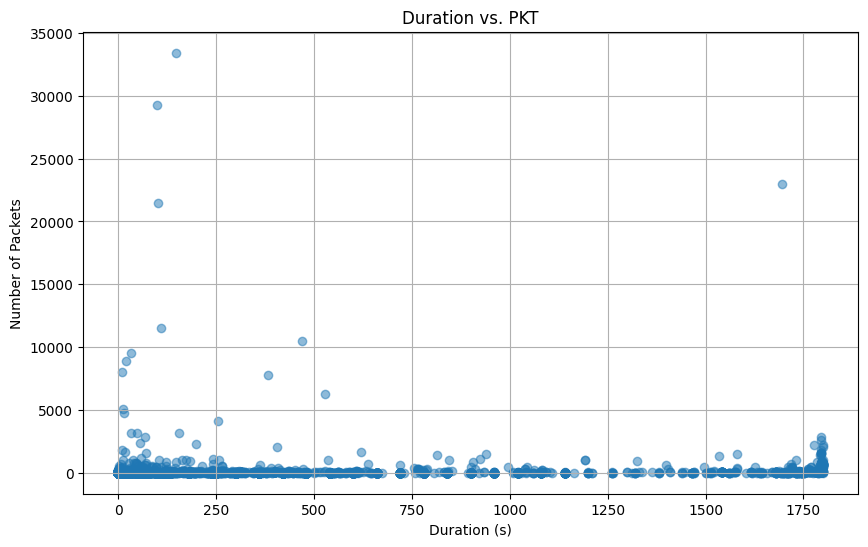

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['pkt'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Packets')
plt.title('Duration vs. PKT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

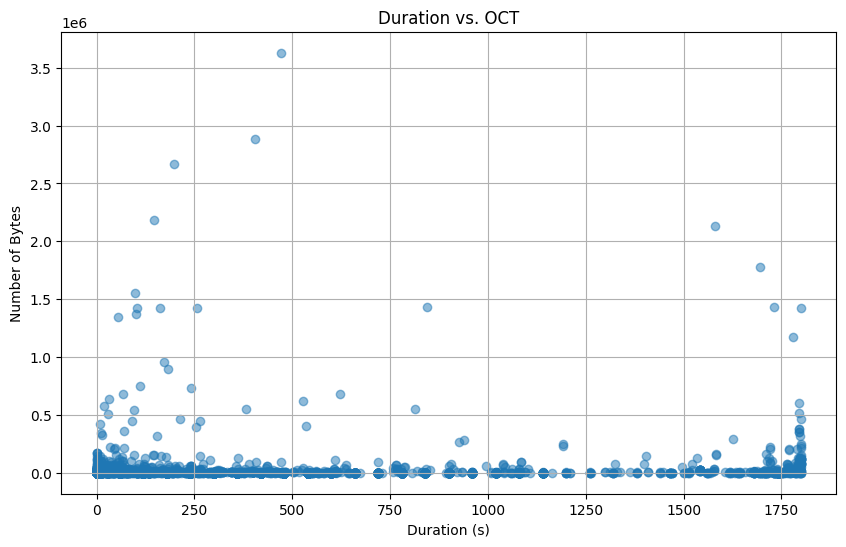

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['oct'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Bytes')
plt.title('Duration vs. OCT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

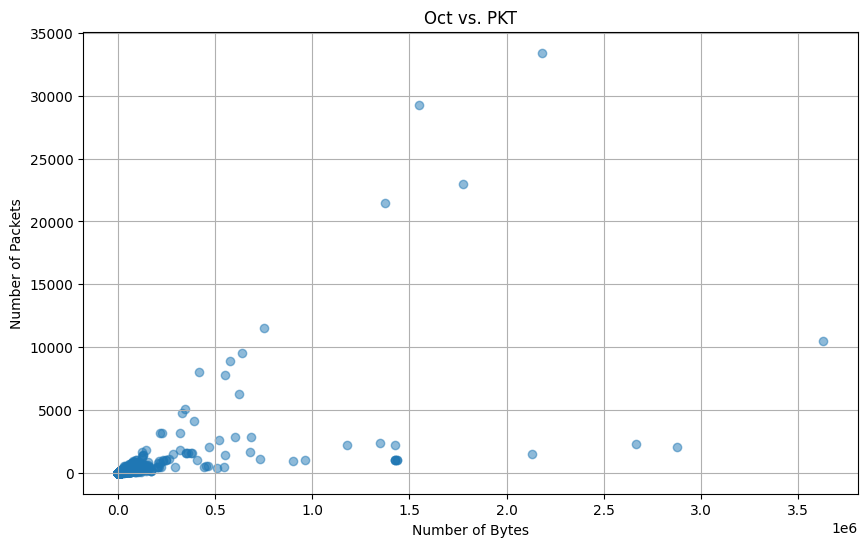

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['oct'], df['pkt'], alpha=0.5)
plt.xlabel('Number of Bytes')
plt.ylabel('Number of Packets')
plt.title('Oct vs. PKT')
plt.grid(True)
plt.show

In [6]:
print(df[['duration', 'rtt', 'pkt', 'oct', 'entropy', 'rpkt']].corr())

          duration       rtt       pkt       oct   entropy      rpkt
duration  1.000000  0.051086  0.064421  0.099142 -0.077321  0.006655
rtt       0.051086  1.000000  0.000617  0.001787  0.009900 -0.000081
pkt       0.064421  0.000617  1.000000  0.615362  0.073003  0.760651
oct       0.099142  0.001787  0.615362  1.000000  0.111671  0.339087
entropy  -0.077321  0.009900  0.073003  0.111671  1.000000  0.027499
rpkt      0.006655 -0.000081  0.760651  0.339087  0.027499  1.000000


In [7]:
# top used source ports
print(df['sp'].value_counts().head(10))

sp
0        49025
443        600
5353       453
1900       284
57893       65
9999        40
60806       36
60805       32
3722        26
138         25
Name: count, dtype: int64


In [8]:
# top used destination ports
print(df['dp'].value_counts().head(10))

dp
2048     24444
0        24366
443       6380
53        1377
5353       453
7788       273
7000       163
1900       142
34560      114
34816       68
Name: count, dtype: int64


In [9]:
top_flows = df.groupby(['sip','dip'])['pkt'].sum().sort_values(ascending=False).head(10)
print(top_flows)

sip           dip           
192.168.50.2  216.68.248.77     60603
              216.68.248.76     43021
              216.68.248.15     30964
              51.81.24.77       29731
              216.68.248.12     18485
              142.251.167.99    10469
              17.253.119.201     8531
              192.168.50.170     7393
              172.64.41.3        7385
              129.137.3.13       7293
Name: pkt, dtype: int64


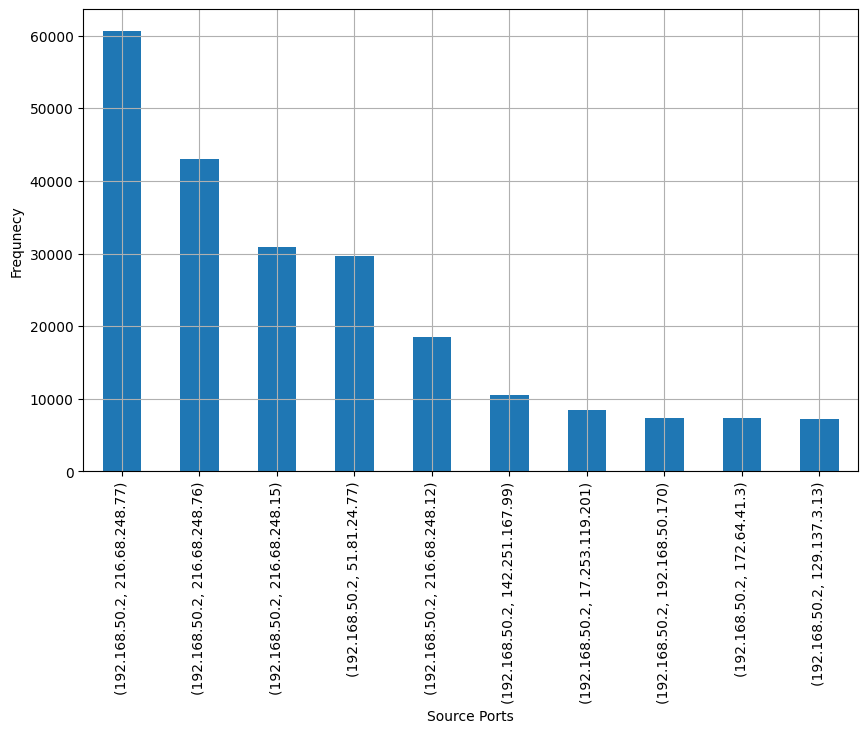

In [10]:
plt.figure(figsize=(10,6))
top_flows.plot(kind= 'bar')
plt.xlabel('Source Ports')
plt.ylabel('Frequnecy')
plt.grid(True)
plt.show()

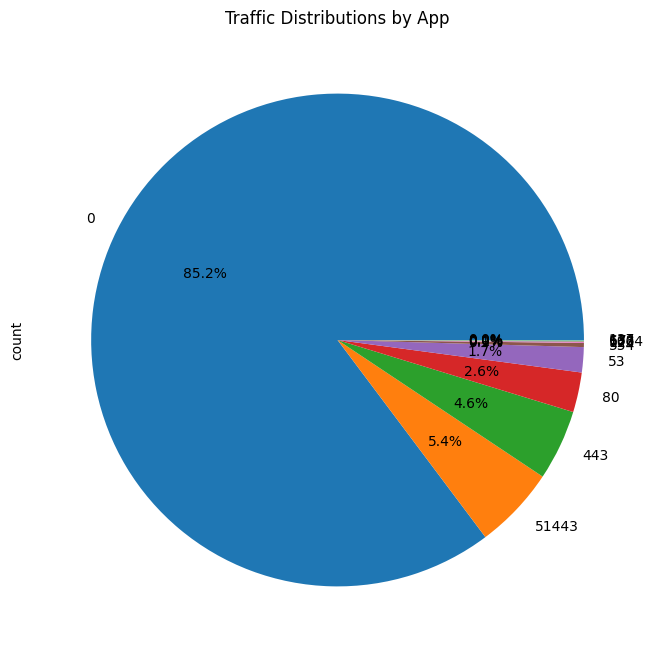

In [11]:
app_distribution = df['app'].value_counts()

plt.figure(figsize=(8,8))
app_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Distributions by App')
plt.show()

In [ ]:
heatmap = df.pivot_table(index='sip', columns='dip', values= 'pkt', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu")
plt.title('Packet Heat Map')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

In [15]:
df.columns = df.columns.str.strip()
df = df.drop(columns = ['isn', 'risn', 'entropy', 'rentropy', 'proto', 'tag', 'rtag'])
print(df.columns)

Index(['start-time', 'end-time', 'duration', 'rtt', 'sip', 'sp', 'dip', 'dp',
       'iflags', 'uflags', 'riflags', 'ruflags', 'pkt', 'oct', 'rpkt', 'roct',
       'app', 'end-reason'],
      dtype='object')


In [16]:
iflag_flows = df.groupby('iflags').agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(iflag_flows)

           duration       rtt     pkt       oct     rpkt        roct
iflags                                                              
0       6251776.008  0.096027  430622  74421551  1419142  1684545514
A         37513.672  0.015126    3821   3008392     2086      459437
AF            0.867  0.004071     189      9528      194        8360
AP        52324.013  0.007070   20826   4379688    12589     4694068
APF           0.001  0.000143       7       972        7         280
AR            0.000  0.000000      33      1692        0           0
ECS        1120.830  0.000667     442    266053      562      485089
R             0.000  0.000000     476     29440        0           0
S        256855.029  0.055516  119000  25454599  1091670  1575645843


In [17]:
end_flows = df.groupby('end-reason').agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(end_flows)

               duration       rtt     pkt       oct     rpkt        roct
end-reason                                                              
active       553092.223  6.106312   77618  17755125    39111    17120781
eof          173318.515  0.214488   12787   4100578     8235     5778715
idle        5622851.933  0.057682  371722  66373181  1393657  1673740517


In [18]:
end_flag_flows = df.groupby(['end-reason', 'iflags']).agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(end_flag_flows)

                      duration       rtt     pkt       oct     rpkt  \
end-reason iflags                                                     
active     0        469265.811  7.153093   54361  12852737    20963   
           A         17761.205  0.021900     442     18822      449   
           AP        44750.879  0.018600   16854   1936825     9231   
           S         21314.328  0.306833    5961   2946741     8468   
eof        0        167614.813  0.216856   10170   1795919     7354   
           A          2147.181  0.008000    1472   2131131      119   
           AP         2413.251  0.025250     807     87715      408   
           ECS           0.083  0.001000      11      4684       11   
           S          1143.187  0.032909     327     81129      343   
idle       0       5614895.384  0.057866  366091  59772895  1390825   
           A          3891.647  0.000426    1054    634450      789   
           AF            0.208  0.021125      10       520       14   
      

In [ ]:
iflags_group = df.groupby('iflags')